# Imports

In [1]:
from scipy.stats import beta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Prior

In [2]:
prior = (1, 1) # uniform between [0, 1]

# Observed data

In [21]:
low_p = 22
low_n = 114

high_p = 34
high_n = 113

In [22]:
low_observed = (low_p, low_n - low_p)
high_observed = (high_p, high_n - high_p)

# Compute posterior

In [23]:
low_price_lik = beta(*(prior[0] + low_observed[0], prior[1] + low_observed[1]))
high_price_lik = beta(*(prior[0] + high_observed[0], prior[1] + high_observed[1]))

# Plot likelihoods

In [24]:
x = np.linspace(0,1,100)

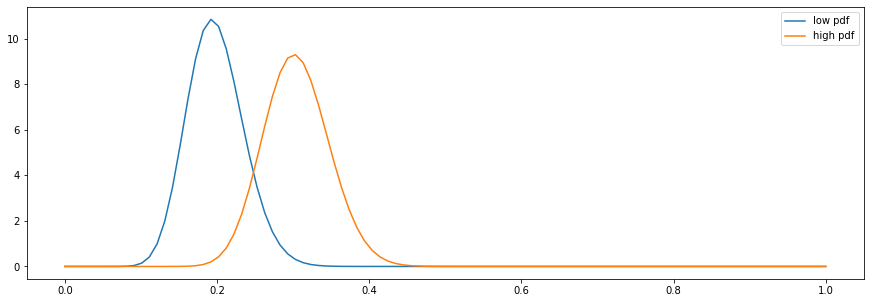

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x, low_price_lik.pdf(x), label='low pdf')
ax.plot(x, high_price_lik.pdf(x), label='high pdf')
plt.legend();

# Sample from likelihood

## Set required uplift

In [29]:
required_tur_mult = 1.2

## Get likelihood of the uplift satisfying the criterion

In [30]:
N = 10000

low_sample = pd.Series(low_price_lik.rvs(N))
high_sample = pd.Series(high_price_lik.rvs(N))

(high_sample >  low_sample * required_tur_mult).mean()

0.862